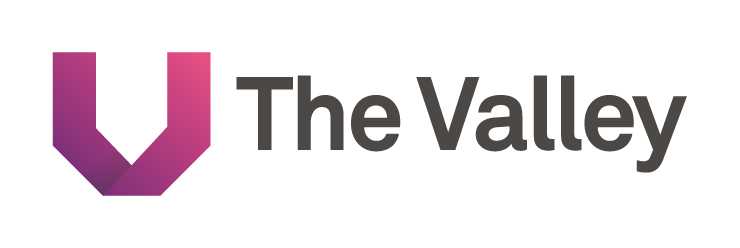</img>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Workshop modelización: Modelos no supervisados

Para mejorar el *engagement* de los usuarios en una plataforma de *streaming* de música, se quiere diseñar un sistema de recomendación de listas de reproducción de canciones basado en las características de las mismas.

Para poder integrarse en la plataforma el sistema debe, dado el historial de las últimas canciones escuchadas por un usuario el sistema debe devolver:

- Al menos 10 listas de reproducción genéricas con canciones distintas en cada una de ellas.

  - El orden de estas listas debería estar basado en la preferencia estimada del usuario por cada una de ellas (primero las que más le vayan a gustar).

  - Las listas de reproducción tendrán que tener una duración aproximada de 1 hora.

- Una lista de reproducción personalizada para el usuario, con las canciones que se estime que más le van a gustar personalmente.

Para construir el sistema tenemos un dataset con las últimas canciones de la plataforma Spotify, con una serie de atributos que la caracterizan descritos a continuación.

## Descripción de los datos

El dataset consta de aproximadamente 174,000 canciones con 18 atributos. Cada una de las canciones tiene un id único generado por Spotify.

### Diccionario de variables


- `id` Id generado por *Spotify*
- `name` Nombre de la canción
- `release_date` Fecha de lanzamiento.
- `artists` Lista de los artistas autores.
- `duration_ms` Duración de la canción en milisegundos.
- `popularity` Popularidad de la canción en el momento de la extracción (Enero de 2021)
- `acousticness` Valor que indica en qué medida una canción es acústica.
- `danceability` Valor que indica en qué medida una canción es bailable.
- `energy` Valor que indica la energía de la canción.

- `instrumentalness` Valor que indica cúanto de instrumental es una canción.
- `valence` Nivel de valencia de la caanción.
- `tempo` Tempo.
- `liveness` Indica si la canción es en vivo.
- `loudness` Nivel de volumen de la canción.
- `speechiness` Cúanto de la canción es vocal.
- `year` Año de la canción.

- `mode` Modo ( 0= Menor, 1 = Mayor)
- `explicit` Indica si tiene contenido para mayores de 18 años(0 = No, 1 = Si)

- `key` Octava de la canción, codificada de 0 a 11.




## Integración

Para integrarse en la plataforma, el objetivo es hacer una función que toma como argumento una lista de `str` con los ids del historial de canciones del usuario.

Debe devolver una Tupla con:

  - Lista de listas de ids, con al menos 10 elementos. (las listas de reproducción genéricas)
  - Lista de ids (la lista de reproducción personalizada)

## Solucion

In [ ]:
# Los datos se encuentran almacenados en un contenedor público de Google Cloud
DATA_URL = "https://storage.googleapis.com/jz-example-data/spotify_data.csv"
# Leemos los datos directamente en memoria utilizando pandas
spotify_data = pd.read_csv(DATA_URL, index_col= "id")
# Mostramos las cinco primeras filas
spotify_data.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
0hbkKFIJm7Z05H8Zl9w30f,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
11m7laMUgmOKqI3oYzuhne,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
19Lc5SfJJ5O1oaxY0fpwfh,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
2hJjbsLCytGsnAHfdsLejp,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


### Análisis exploratorio de los datos

Antes de nada vamos a hacer un breve análisis exploratorio de los datos.

Para esta iteración, vamos a ignorar las variables `artist`, `name` y `release_date`.

La variable `artist` la podremos utilizar a futuro en un modelo más complejo, ya que podría ser interesante extraer información de ahí (canciones de los mismos artistas serán similares, podría hacer recomendaciones por artista...) pero es complejo de incluir en un modelo tabular.

La variable `nombre` no contiene mucha información ya que, en general, es único y es dificil de relacionar el nombre para comparar dos canciones, aunque también se podría explorar a futuro.

La variabe `release_date` da un poco más de información que `year` ya que, en algunos casos incluye mes y dia, pero no parece a priori que sea muy importante, también se podría explorar a futuro.

Vamos a explorar las distribuciones del resto de variables.

In [ ]:
ignore_features = ('artists','name', 'release_date')
features = [
  feature for feature in spotify_data.columns if feature not in ignore_features
]

In [ ]:
spotify_data[features].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


A la vista de los datos, llama laatención la duración mínima y máxima de alguna de las canciones, que llegan a estar entre 4 y 5,000 segundos.

Para hacer la recomendación, y a la vista de que queremos listas de duración razonable, vamos a filtrar canciones que estén entre 1 minuto (60,000 ms) y 10 minutos (600,000 ms).

In [ ]:
spotify_data = spotify_data[spotify_data["duration_ms"].between(60_000, 600_000)]

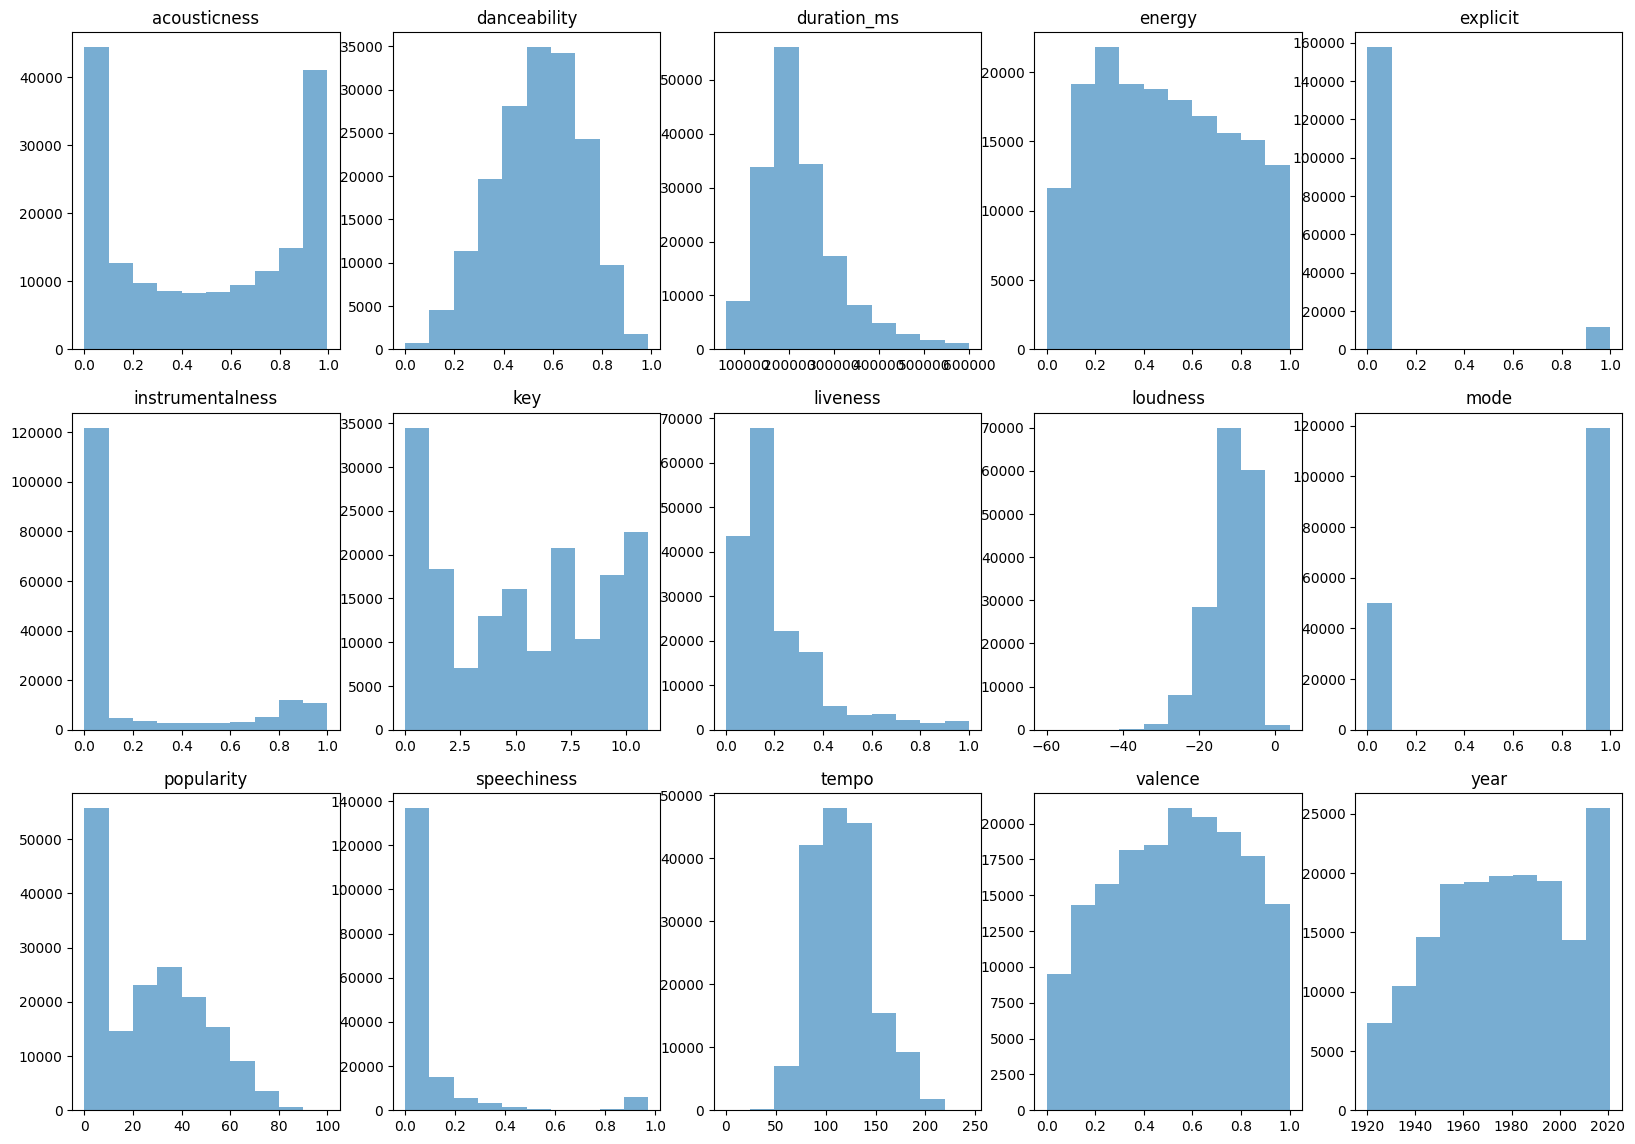

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 14))

for feature, ax in zip(features, axes.flatten()):
  ax.set_title(feature)
  ax.hist(spotify_data[feature], alpha = 0.6)

Vamos ahora a chequear si tenemos **nulos** en alguna columna.

In [ ]:
spotify_data.columns[spotify_data.isna().any() == True]

Index([], dtype='object')

Como podemos ver, parece que no hay nulos en ninguna.

A continuación chequeamos **duplicados**. Vamos a considerar duplicados, aquellas canciones con el mismo id.

In [ ]:
print(f"Número distinto de id's: {spotify_data.index.unique().size}")
print(f"Número de registros: {spotify_data.shape[0]}")

Número distinto de id's: 167242
Número de registros: 169286


Podemos ver que tenemos algunos duplicados en el dataset. Podríamos hacer un análisis más profundo pero de momento vamos a quedarnos con el registro que aparezca primero de los que están duplicados.

In [ ]:
spotify_data = spotify_data.groupby("id").first()

Por último vamos a chequear si hay alguna correlación alta entre dos variables, ya que puede dañar la interpretabilidad del modelo y su performance.

Vamos a utilizar la correlación lineal, hay que tener en cuenta que podría haber relaciones no lineales que no tendríamos en cuenta, y que no es el mejor método para variables binarias como `explicit` o `mode`, pero para una primera iteración nos valdría.

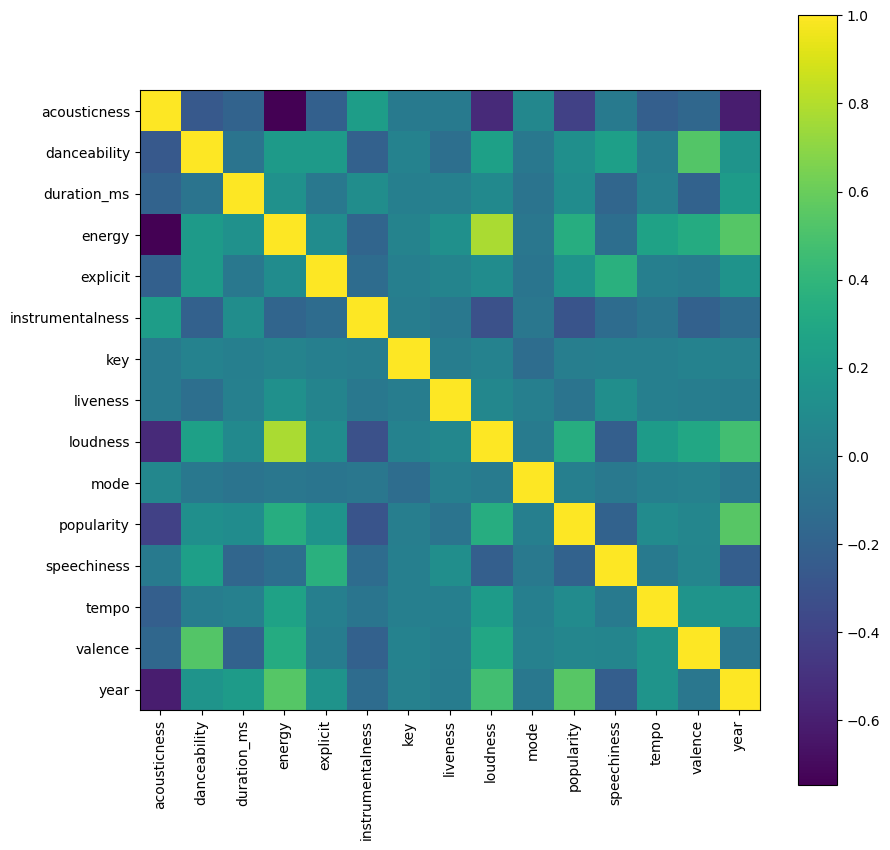

In [ ]:
correlations = spotify_data[features].corr()

fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(correlations)
plt.colorbar()
n = len(correlations.index)
plt.xticks(range(n), correlations.index, rotation="vertical")
plt.yticks(range(n), correlations.columns)
plt.show()

Podemos observar alguna correlación alta:

- `acousticness` y `energy` tienen una fuerte relación inversa, cuanto más acústica es una canción menor energía tiene.

- `energy` y `loudness` también están fuertemente correlacionados, esta vez directamente.

Podríamos tomar como decisión eliminar alguna de estas variables o hacer algún tipo de reducción dimensional (por ejemplo PCA) para eliminar estas correlaciones, pero en principio, no parece que merezca la pena en una primera iteración.

### Modelización

Para caracterizar cada canción, vamos a eliminar las variables `popularity`, `duration_ms` y `year`. Está es una decisión funcional, ya que en principio no quiero que mis modelos tomen en cuenta ni la popularidad ni el año, ni la duración de la canción para recomendar.

Estaría perfectamente bien incluirlas si se quiere que el modelo las tenga en cuenta.

In [ ]:
features =[f for f in features if f not in ('popularity', 'year', 'duration_ms')]

In [ ]:
features

['acousticness',
 'danceability',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence']

Adicionalmente, ya que no quiero que ninguna de las variables tenga mayor importancia que las demás en la modelización, y hemos visto que tienen distintos ordenes de magnitud vamos a transformarlas todas al rango (0, 1) con una transformación lineal (no modifica la distribución).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
spotify_data[features] = scaler.fit_transform(spotify_data[features].values)

In [ ]:
spotify_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,,
000G1xMMuwxNHmwVsBdtj1,0.013153,['Blondie'],0.259109,182347,0.895,0.0,0.000106,0.181818,0.0821,0.863519,1.0,Will Anything Happen,29,1978-09-23,0.072812,0.785632,0.5550,1978
000Npgk5e2SgwGaIsN3ztv,0.983936,['Talat Mahmood'],0.280364,206972,0.145,0.0,0.879000,0.272727,0.1110,0.628017,1.0,Mere Hamsafar,0,1953-12-31,0.087024,0.310644,0.4940,1953
000ZxLGm7jDlWCHtcXSeBe,0.798193,"['Meade ""Lux"" Lewis']",0.693320,314667,0.483,0.0,0.878000,0.181818,0.1130,0.779861,0.0,Torpedo Juice,1,1954-01-01,0.034706,0.401196,0.8540,1954
000jBcNljWTnyjB4YO7ojf,0.658635,['Trio Maravilla'],0.797571,179747,0.808,0.0,0.000000,0.454545,0.1540,0.836426,1.0,Me Quieres Perjudicar,0,1954-01-01,0.040680,0.464241,0.9690,1954
000mGrJNc2GAgQdMESdgEc,0.303213,"['Ernest Chausson', 'Pierre Monteux']",0.076215,498560,0.150,0.0,0.884000,0.181818,0.1210,0.678021,0.0,"Symphony in B-Flat Major, Op. 20: II. Très len...",0,1951,0.038208,0.314398,0.0351,1951


#### Listas de reproducción genéricas

Para crear listas de reproducción genéricas, parece que tendría sentido utilizar algún tipo de algoritmo de clustering, por lo menos para separar las canciones en grupos homogéneos.

Vamos a explorar los pros y contras de los algoritmos de clustering que hemos visto:

- K-means/medoids: Es el algoritmo *to go*. En este caso nos puede dar problemas ya que hace grupos del mismo tamaño. Si hay tipos de canciones menos representados en el dataset, los va a agrupar juntos y la recomendación va a ser peor.

- Jerárquicos: Tenemos aproximadamente 150k muestras, es inviable entrenar este tipo de algoritmos con este orden de magnitud de registros. En todo caso habría que hacerlo sobre una muestra. No nos vale para nuevas canciones por lo que habría que reentrenarlo frecuentemente con cada nueva canción añadida.

- DBScan: En mi opinión (totalmente personal) es complicado ajustar los hiperparámetros (epsilon y radio de búsqueda) en casos con muchas dimensiones, y que quede un número de clusters razonable y no marque muchas canciones como ruido. Tiene el mismo problema que el clustering jerarquico, habría que rehacer los clusters con cada nueva canción.

En mi opinión, si queremos ir hacia está aproximación de clustering, habría que ir hacia un algún tipo de método mixto jerárquico - kmeans.

Por simplicidad, vamos a utilizar directamente k-means, pero hay que tener en cuenta que muy probablemente los géneros de música menos representados en el dataset nos queden en el mismo cluster aunque se parezcan poco.

Tenemos que hacer un mínimo de 10 listas de reproducción, vamos a chequear la inercia de los clusters con 10, 20, 30 y 40, por ejemplo, a ver en que punto nos quedamos.

In [ ]:
from sklearn.cluster import KMeans

n_clusters_list = [10, 20, 30, 40]
kmeans_list = list()
for n in n_clusters_list:
  print(f"Entrenando con {n} clusters.")
  kmeans = KMeans(n_clusters=n, random_state=0).fit(spotify_data[features])
  kmeans_list.append(kmeans)

Entrenando con 10 clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Entrenando con 20 clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Entrenando con 30 clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Entrenando con 40 clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


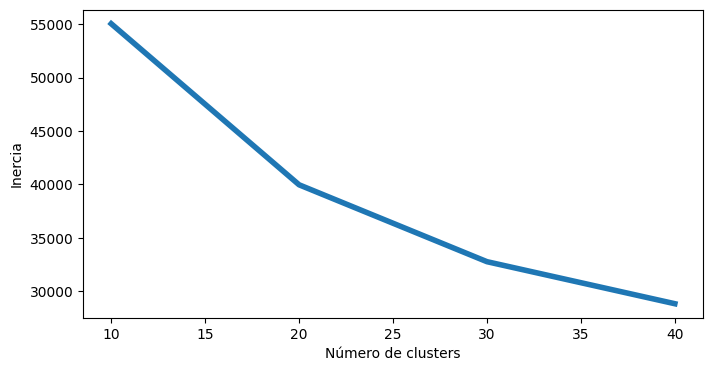

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_ylabel("Inercia")
ax.set_xlabel("Número de clusters")
ax.plot(n_clusters_list, [m.inertia_ for m in kmeans_list], linewidth=4)
plt.show()

Aunque no está del todo claro, podemos ver un cierto quiebro en 20 clusters. De nuevo, como una primera aproximación, nos podemos quedar con este número.

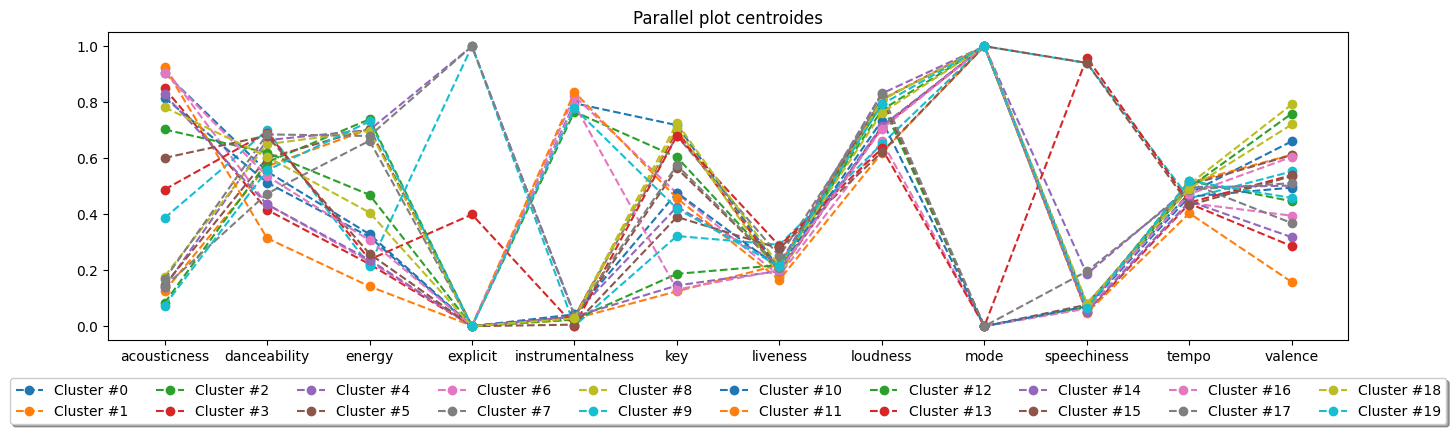

In [ ]:
best_kmeans = kmeans_list[1]

fig, ax = plt.subplots(figsize = (16, 4))
for i, row in enumerate(best_kmeans.cluster_centers_):
  ax.plot(features, row, marker = "o", linestyle="--", label = f"Cluster #{i}")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=10)
ax.set_title("Parallel plot centroides")
plt.show()

Añadimos las etiquetas al dataset:

In [ ]:
spotify_data["cluster_label"] = best_kmeans.labels_

En este caso, cada grupo tendrá aproximadamente 5,000 - 10,000 canciones. Como queremos listas de reproducción de aproximadamente 1hora, tenemos que seleccionar una muestra de cada uno de los grupos.

Vamos a hacer una lista de 20 canciones para cada grupo, lo que nos dará aproximadamente 1 hora de duración (3 min/canción). Sería mejor ordenar las canciones y ir seleccionado hasta completar la hora en función de la duración.

En este primer punto, queremos que las listas sean iguales para todos los usuarios, por lo que no podemos utilizar información de estos para generarlas.

Algunas estrategias para seleccionar posibles serían:

- Muestra aleatoria: La lista va a tener mucha diversidad, quizá demasiada debido al alto número de canciones.

- Canciones más populares. Vamos a introducir un bias, que quizá no le guste a todo el mundo de que las canciones van a ser populares.

- Canciones más cercanas al centro del grupo. Las canciones van a ser muy parecidas, pero igual hay poca diversidad.

Vamos a combinar dos métodos de una manera que, a priori, parece lógica, aunque se podría hacer de muchas maneras.

Tomamos los N=500 canciones más cercanas al centro del cluster y de ellas tomamos las 20 más populares.

Para ello, primero calculamos la distancia de cada canción al centro de su cluster.

In [ ]:
from sklearn.metrics import pairwise_distances

spotify_data["cluster_distance"] = np.nan

for label in spotify_data["cluster_label"].unique():

  cluster_components = spotify_data["cluster_label"] == label

  distances = pairwise_distances(
      kmeans.cluster_centers_[label].reshape(1, -1),
      spotify_data.loc[cluster_components, features]
  )
  spotify_data.loc[cluster_components, "cluster_distance"] = distances.flatten()

Aplicamos la operación de selección para cada cluster.

In [ ]:
listas = (
    spotify_data
      .sort_values("cluster_distance", ascending = True)
      .groupby("cluster_label")
      .head(1000)
      .sort_values("popularity", ascending = False)
      .groupby("cluster_label")
      .head(20)
      .sort_values("cluster_label")
)

In [ ]:
for label in listas["cluster_label"].unique():
  lista = listas[listas["cluster_label"] == label]
  print(f"Lista #{label}: {lista.name.to_list()}")

Lista #0: ['Welcome Home, Son', 'worldstar money (interlude)', 'Burn One Down', 'Tears in Heaven', 'Buttercup', 'Welcome Home', 'Blondie', 'Show Me How', 'Misread', 'A Real Hero', 'Dear Marie', 'worldstar money (interlude)', 'Tears in Heaven', 'controlla', "Feel Like Makin' Love", 'Dumb', 'New Flesh', 'Funny Thing', 'Só Tinha De Ser Com Você', 'Sunset Lover']
Lista #1: ['Just Give Me a Reason (feat. Nate Ruess)', 'Lose Somebody', "Like I'm Gonna Lose You (feat. John Legend)", 'Hasta Que Me Olvides', 'Mr Loverman', 'Wind Of Change', 'Takeaway', "You're Still The One", "What's Up?", 'Amor del Bueno', 'Against All Odds (Take a Look at Me Now) - 2016 Remaster', 'You & I', 'Because You Loved Me (Theme from "Up Close and Personal")', "Nobody's Love", 'Christmas Without You', 'Us', 'Lose Somebody', 'Speechless', 'Slow Dance', 'Cover Me Up']
Lista #2: ['Losing Interest', 'Schism', 'Teardrop', 'Quick Musical Doodles', 'Magic', 'Paris', 'My Kind of Woman', 'Better Off Alone', "Can't Get You out 

#### Recomendación personalizada

La idea más directa para hacer una playlist personalizada para un usuario con los datos que tenemos sería coger sus N últimas canciones y configurar la lista con canciones similares. En vez de las últimas escuchadas podríamos utilizar las más escuchadas, o una combinación de ambas.

Para medir la similitud utilizaríamos alguna métrica de distancia entre las variables que caracterizan a las canciones, para ello podemos montar un algoritmo no supervisado de vecinos cercanos.  Como distancia vamos a utilizar como distancia la euclidea, aunque podríamos utilizar otras, en iteraciones posteriores.

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors().fit(spotify_data[features])

Una vez tenemos montado el algoritmo podemos pensar la estrategia.

La estrategia más "naive" sería tomar la media de los atributos de las últimas
canciones escuchadas.

In [ ]:
musica_clasica = ['0beEOHhUTXBQyQbwD0BO9B', '6izxDWP8kx2yErjuHOdhHV', '7Br8VQqZs2KJESjzCTfezZ']
hip_hop = ['4LwU4Vp6od3Sb08CsP99GC', '6DCZcSspjsKoFjzjrWoCdn']
dance = ['5UqCQaDshqbIk3pkhy4Pjg', '0nrRP2bk19rLc0orkWPQk2','3aQz0z86zrKjd1mcZlonxE']
rock = ['08mG3Y1vljYA6bvDt4Wqkj', '57bgtoPSgt236HzfBOd8kj',  '2zYzyRzz6pRmhPzyfMEC8s']

In [ ]:
example = musica_clasica

for song_attributes in spotify_data.loc[example].itertuples():
    print("---")
    print("Id:", song_attributes.Index)
    print("Artist: ", song_attributes.artists)
    print("Name: ",song_attributes.name)
    print("---\n")


---
Id: 0beEOHhUTXBQyQbwD0BO9B
Artist:  ['Luigi Boccherini', 'Berliner Philharmoniker', 'Herbert von Karajan']
Name:  Quintettino Op.30 No.6, G.324: 4. Passacalle
---

---
Id: 6izxDWP8kx2yErjuHOdhHV
Artist:  ['Wolfgang Amadeus Mozart', 'Berliner Philharmoniker', 'Claudio Abbado', 'Swedish Radio Choir', 'Kay Johannsen']
Name:  Requiem in D Minor, K. 626: 3. Sequentia: Lacrimosa - Live
---

---
Id: 7Br8VQqZs2KJESjzCTfezZ
Artist:  ['Jean Sibelius', 'Berliner Philharmoniker', 'Herbert von Karajan']
Name:  Valse triste, Op.44
---



In [ ]:
X = spotify_data.loc[musica_clasica][features].values.mean(axis = 0)

In [ ]:
distances, indices = nn.kneighbors(X.reshape(1, -1), 20)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
for song_attributes in spotify_data.iloc[indices[0]].itertuples():
    print("---")
    print("Id:", song_attributes.Index)
    print("Artist: ", song_attributes.artists)
    print("Name: ",song_attributes.name)
    print("---\n")



---
Id: 389qtBoJVF0riHChgXgrkt
Artist:  ['John Williams']
Name:  Moaning Myrtle
---

---
Id: 1claYKSm3Dtv1597iJMGev
Artist:  ['Wolfgang Amadeus Mozart', 'Jenő Jandó', 'Concentus Hungaricus', 'Matyas Antal']
Name:  Piano Concerto No. 25 in C Major, K. 503: II. Andante
---

---
Id: 3bsLJqeT47FyKCm917sP9x
Artist:  ['Wolfgang Amadeus Mozart', 'Budapest String Quartet']
Name:  Quartet No. 19 in C Major for Strings, K. 465 ("Dissonant"): II. Andante cantabile
---

---
Id: 0VJBx6lUp6wZQgecR8YvbV
Artist:  ['Johann Sebastian Bach', 'Charles Gounod', 'Eugene Ormandy', 'Philadelphia Orchestra']
Name:  Ave Maria
---

---
Id: 1GplZHcGqKgYn5DsJnePft
Artist:  ['Johann Sebastian Bach', 'Charles Gounod', 'Eugene Ormandy', 'Philadelphia Orchestra']
Name:  Ave Maria
---

---
Id: 4ovQlgSLQsDpmE4SplH10J
Artist:  ['Miracle Tones', 'Solfeggio Healing Frequencies']
Name:  528 Hz Love Frequency
---

---
Id: 0bedbzMf1fpDK2MwdLSPOR
Artist:  ['Maranatha! Instrumental']
Name:  Jesus, Draw Me Close - Instrumental
-